# РК1 ТМО
____________
ИУ5-62б

Васильев Денис

Вариант 3
_______________

# Данные по варианту

Номер задачи - 1

Номер набора данных для задачи - 3

### Дополнительная задача по группе (62)

Для произвольной колонки данных построить гистограмму

______________________

# Задача 1

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

### Набор данных

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
sns.set(style="ticks")

from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['TARGET'] = wine.target

In [3]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  TARGE

Как видно из результата выполнения предыдущего кода, пропусков в данных нет.

In [5]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
corr_matrix = data.corr()

In [7]:
corr_matrix['TARGET']

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
TARGET                          1.000000
Name: TARGET, dtype: float64

In [8]:
corr_matrix_kendall = data.corr(method='kendall')
corr_matrix_kendall['TARGET']

alcohol                        -0.238984
malic_acid                      0.247494
ash                            -0.038085
alcalinity_of_ash               0.449402
magnesium                      -0.184992
total_phenols                  -0.590404
flavanoids                     -0.725255
nonflavanoid_phenols            0.379234
proanthocyanins                -0.450225
color_intensity                 0.065124
hue                            -0.479229
od280/od315_of_diluted_wines   -0.607572
proline                        -0.406260
TARGET                          1.000000
Name: TARGET, dtype: float64

In [9]:
corr_matrix_spearman = data.corr(method='spearman')
corr_matrix_spearman['TARGET']

alcohol                        -0.354167
malic_acid                      0.346913
ash                            -0.053988
alcalinity_of_ash               0.569792
magnesium                      -0.250498
total_phenols                  -0.726544
flavanoids                     -0.854908
nonflavanoid_phenols            0.474205
proanthocyanins                -0.570648
color_intensity                 0.131170
hue                            -0.616570
od280/od315_of_diluted_wines   -0.743787
proline                        -0.576383
TARGET                          1.000000
Name: TARGET, dtype: float64

<AxesSubplot:>

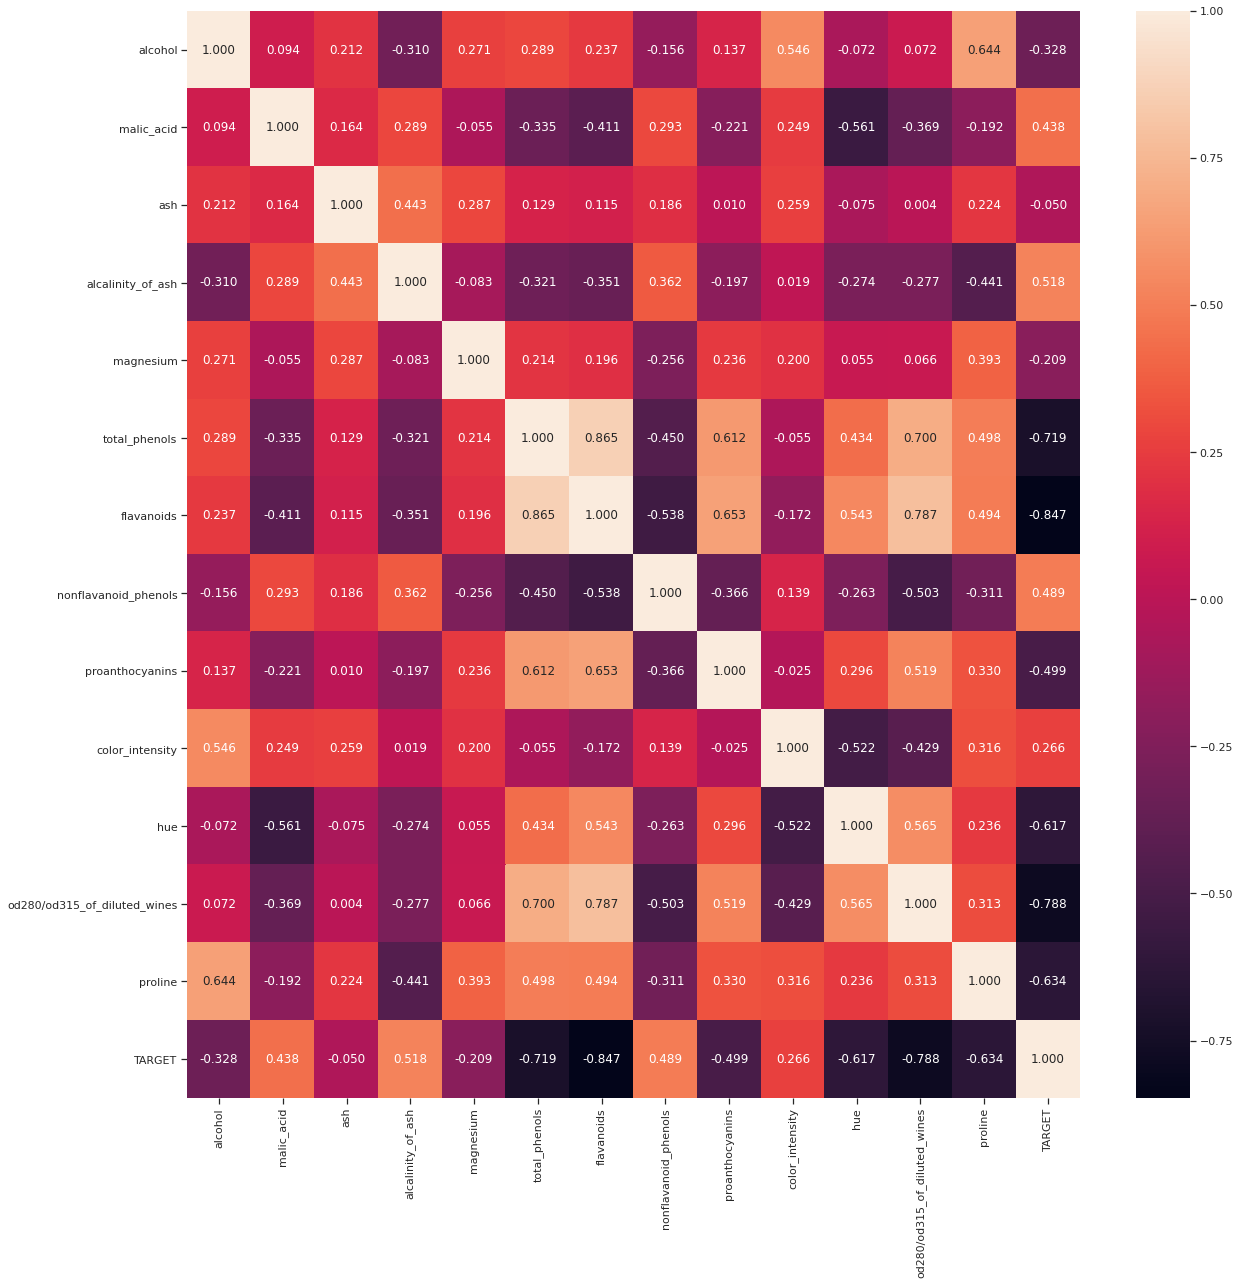

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='.3f')

### Примечание

По результатам корреляционного анализа разными методами можем заметить, что самая сильная корреляция целевого признака наблюдается со следующими признаками:

- flavanoids
- od280....
- total_phenols

<AxesSubplot:xlabel='od280/od315_of_diluted_wines', ylabel='TARGET'>

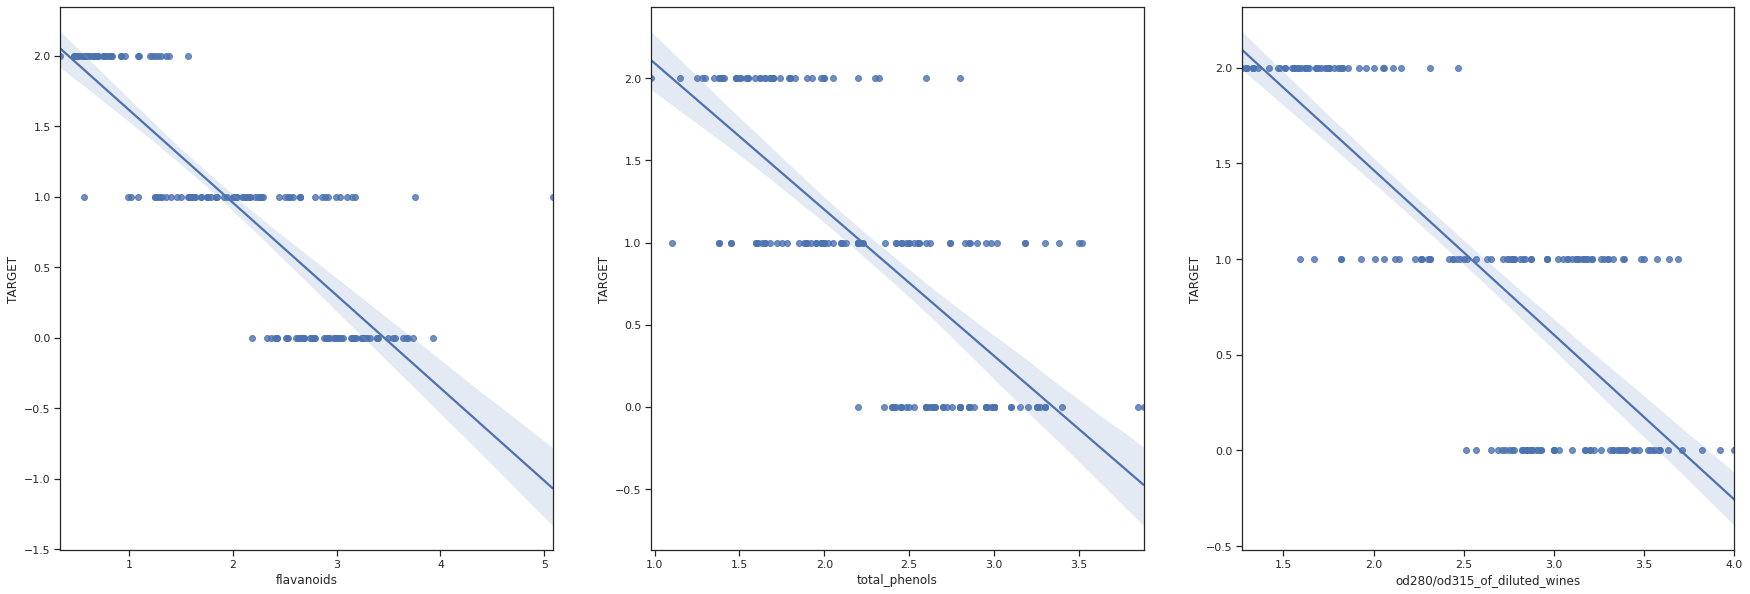

In [11]:
fig, axs = plt.subplots(ncols=3, figsize=(30,10))
sns.regplot(x=data['flavanoids'], y=data['TARGET'], ax = axs[0])
sns.regplot(x=data['total_phenols'], y=data['TARGET'], ax = axs[1])
sns.regplot(x=data['od280/od315_of_diluted_wines'], y=data['TARGET'], ax = axs[2])

<AxesSubplot:xlabel='TARGET'>

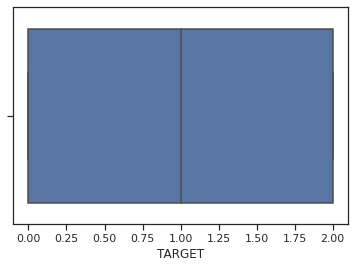

In [12]:
sns.boxplot(x=data['TARGET'])

<Figure size 864x432 with 0 Axes>

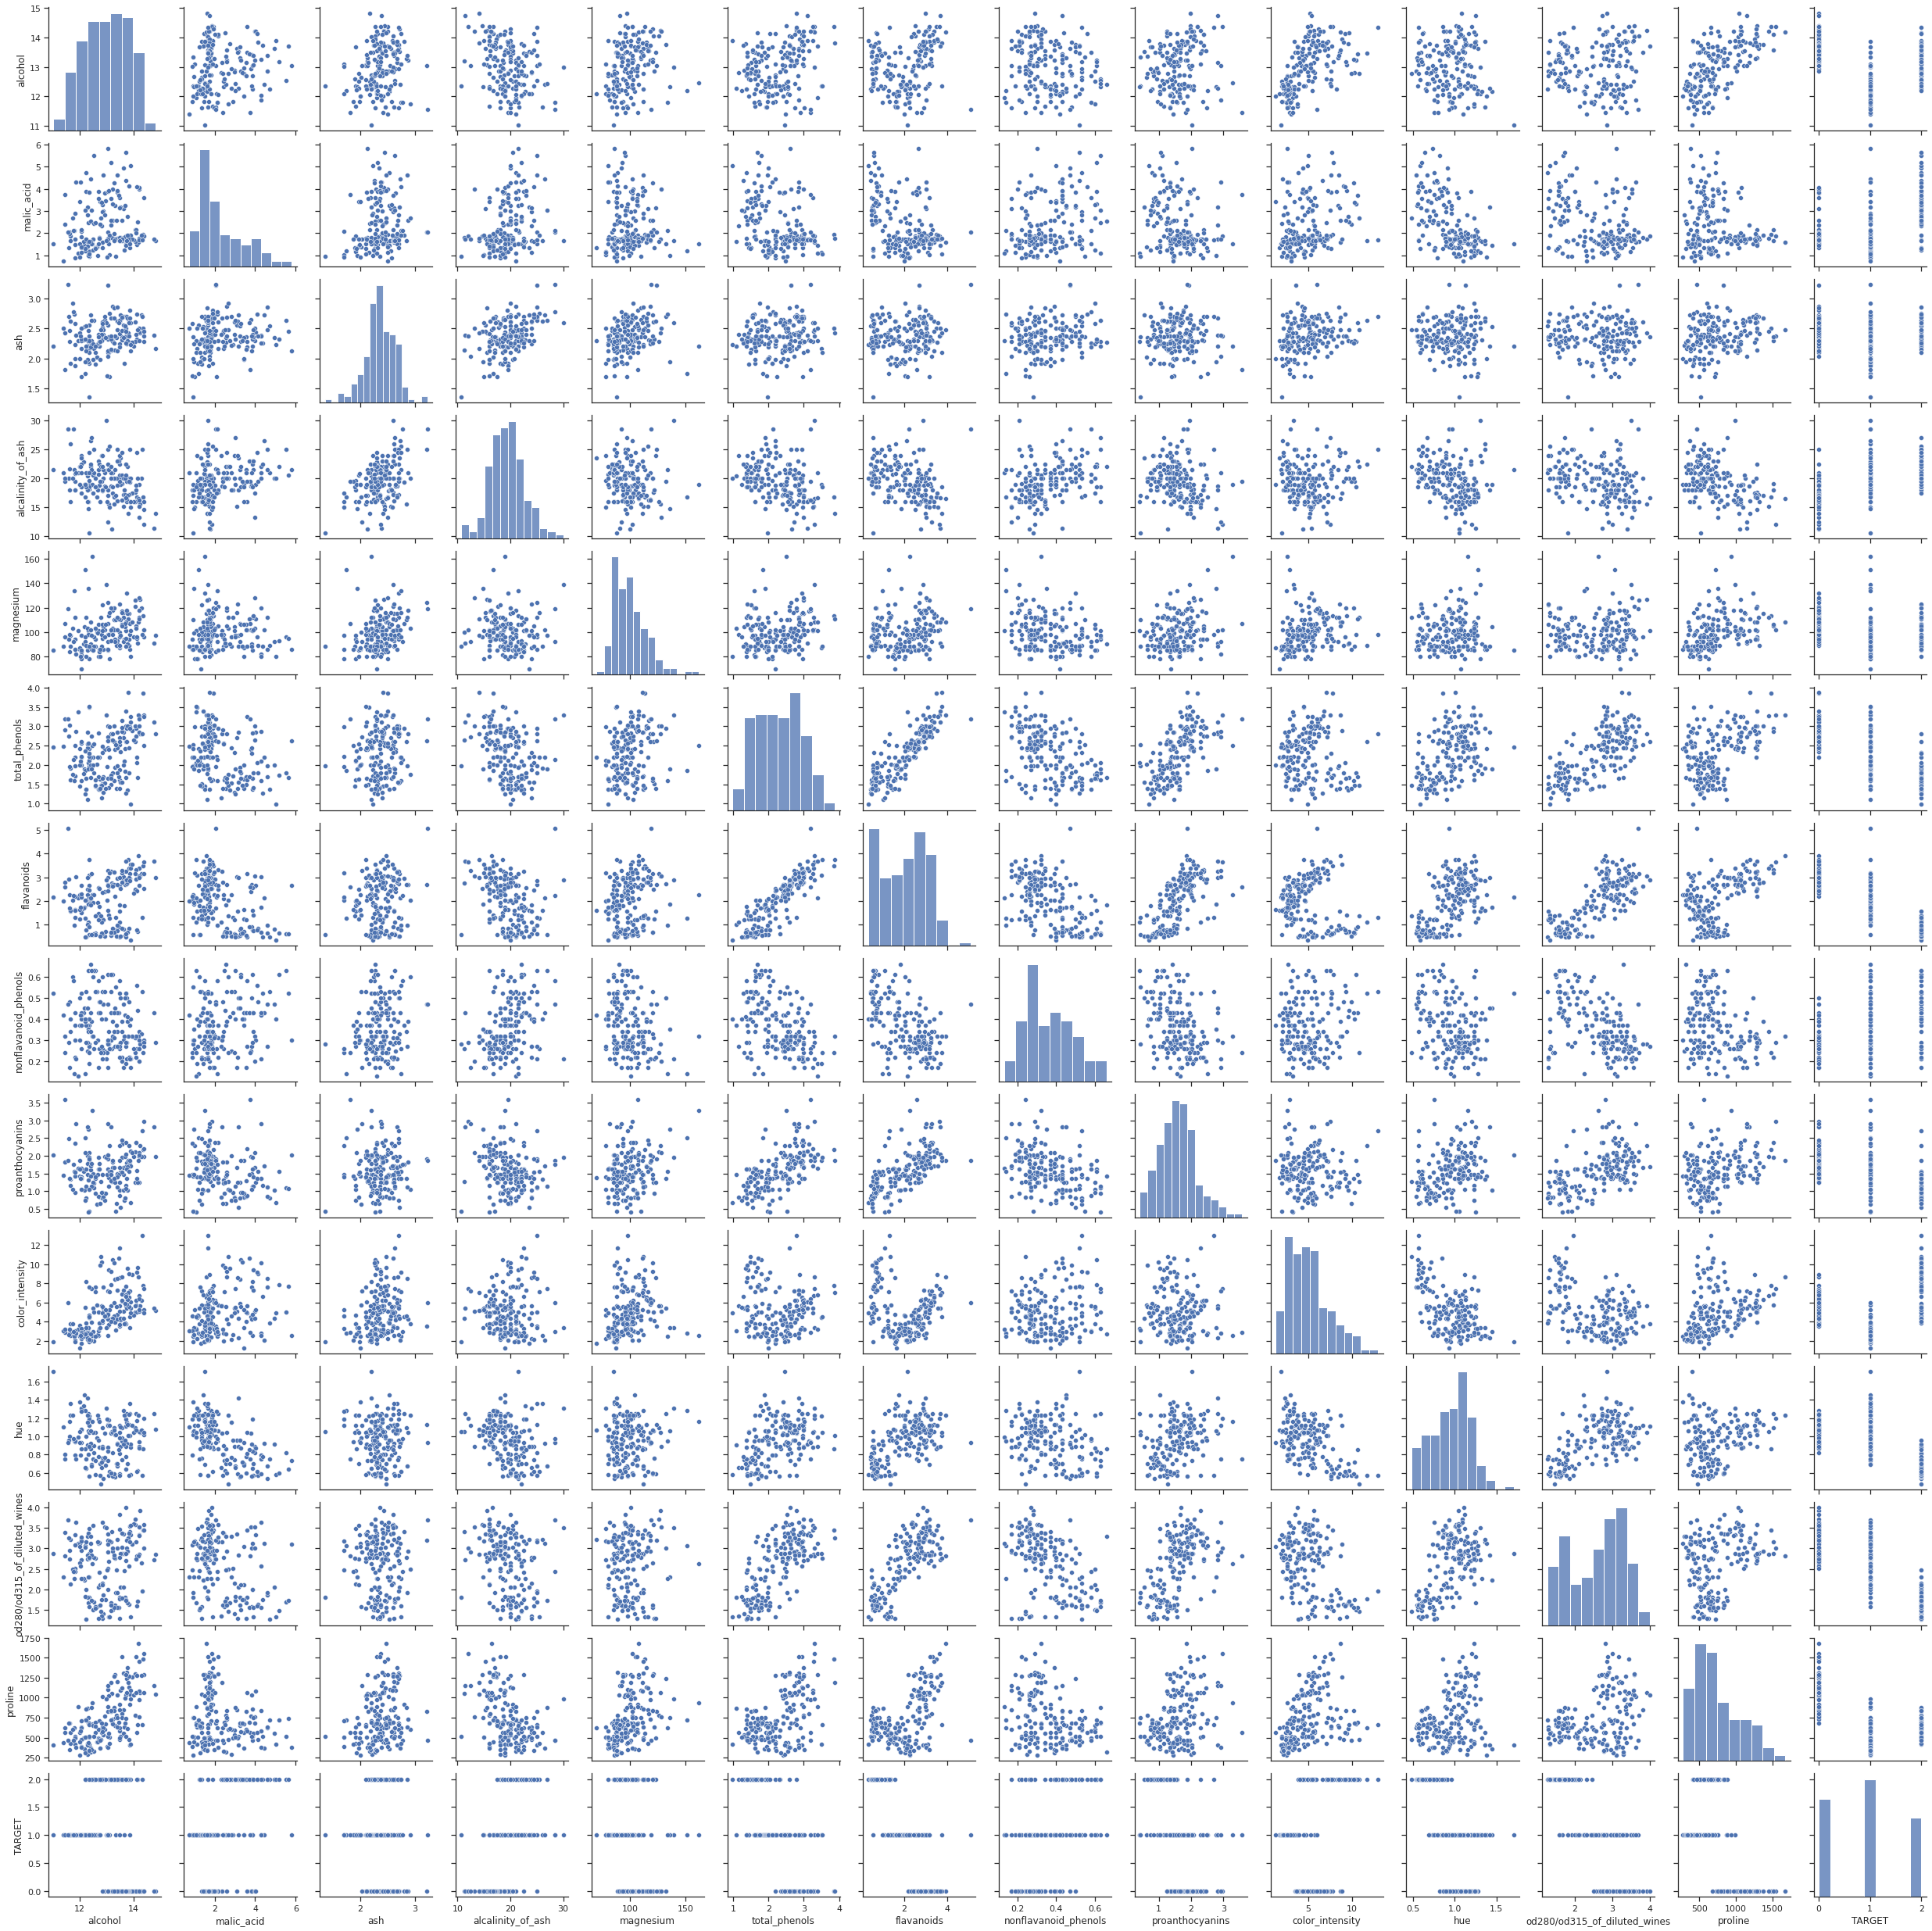

In [13]:
plt.figure(figsize=(12,6))
sns.pairplot(data)

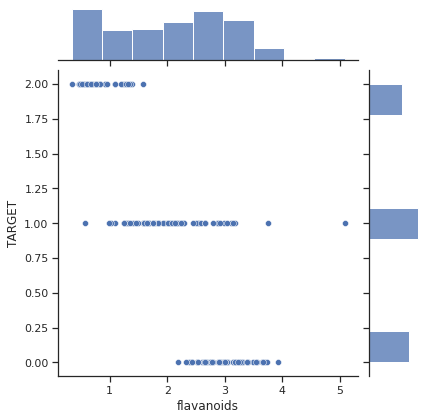

In [14]:
sns.jointplot(x = "flavanoids", y = "TARGET", kind="scatter", data = data)

<AxesSubplot:xlabel='flavanoids', ylabel='TARGET'>

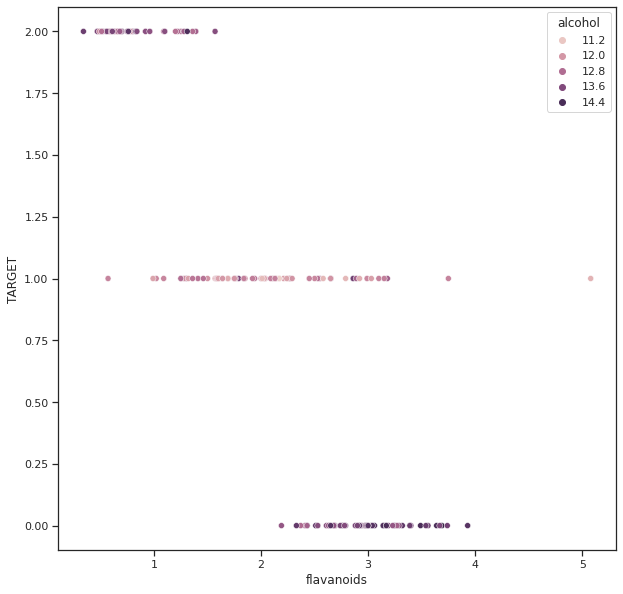

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='flavanoids', y='TARGET', data=data, hue='alcohol')

## Вывод

Оба признака flavanoids и total_phenols хорошо коррелируют как друг с другом, так и с целевым признаком. Для дальнейшего анализа можно отбросить один из этих признаков.

Также из выборки можно исключить признаки ash и color_intensity, которые имеют очень слабую корреляцию с целевым признаком.